In [1]:
path = "../Outputs/"

In [2]:
%matplotlib inline  
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

# $H_{tide}(r,\omega) $ profiles

In [3]:
# Import data
filename = path+"H_profile.txt"
names = ["r(m)","Htide(W.m-3)","T(days)","n"]
data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)

n = data["n"][0] # nbr of radius
nbr_exp = int(data.shape[0]/n) # nbr of experiements

#Radius
R = data["r(m)"][:n]
R = [int(r/1e3) for r in R]

#Htide and Period
H_matrix = np.zeros((n,nbr_exp),dtype=float)
Periods = []
for i in range(nbr_exp):
    H_matrix[:,i] = data["Htide(W.m-3)"][i*n:(i+1)*n]
    Periods.append(round(data["T(days)"][i*n],2))

In [1]:
# Plot
fig, ax = plt.subplots(figsize=(7,10))
im=ax.imshow(np.log(H_matrix), origin='lower',aspect="auto")

ax.set_yticks([k for k in range(0,H_matrix.shape[0],5)])
ax.set_yticklabels([R[k] for k in range(0,len(R),5)])

step = int(len(Periods)/10)
ax.set_xticks([k for k in range(0,len(Periods),step)])
ax.set_xticklabels([Periods[k] for k in range(0,len(Periods),step)])

plt.ylabel("Radius (km)", fontsize=12)
plt.xlabel("Orbital period (days)",fontsize=12)
plt.title("$H_{tide}$ profiles frequency dependance")
fig.colorbar(im,ax=ax,label='$log(H_{tide})$ (W.m-3)')
plt.savefig("figures/H-frequency_map.pdf")

NameError: name 'plt' is not defined

# $H_{\mu} \cdot  \Im(\mu)$ profiles

In [434]:
# Import data
filename = path+"Hmu_mu.dat"
names = ["r(m)","Hmu_mu(W.m-3)","T(days)","n"]
data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)

n = data["n"][0]-1 # nbr of radius -1 here bc in K2_DT start at j=2
nbr_exp = int(data.shape[0]/n) # nbr of experiements

#Radius
R = data["r(m)"][:n]
R = [int(r/1e3) for r in R]

#Htide and Period
H_matrix = np.zeros((n,nbr_exp),dtype=float)
Periods = []
for i in range(nbr_exp):
    H_matrix[:,i] = data["Hmu_mu(W.m-3)"][i*n:(i+1)*n]
    Periods.append(round(data["T(days)"][i*n],2))

In [435]:
#Optional
#substract reference to see variations
#_matrix = np.subtract(H_matrix, np.vstack(H_matrix[:,0]))

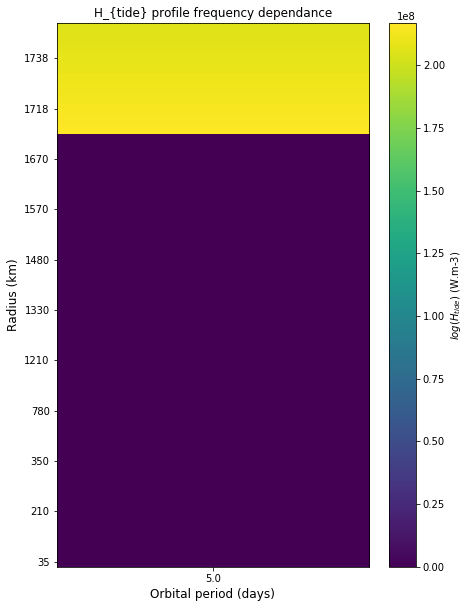

In [436]:
# Plot
fig, ax = plt.subplots(figsize=(7,10))
im=ax.imshow(H_matrix, origin='lower',aspect="auto")

ax.set_yticks([k for k in range(0,H_matrix.shape[0],5)])
ax.set_yticklabels([R[k] for k in range(0,len(R),5)])

step = int(len(Periods)/10) +1
ax.set_xticks([k for k in range(0,len(Periods),step)])
ax.set_xticklabels([Periods[k] for k in range(0,len(Periods),step)])

plt.ylabel("Radius (km)", fontsize=12)
plt.xlabel("Orbital period (days)",fontsize=12)
plt.title("H_{tide} profile frequency dependance")
fig.colorbar(im,ax=ax,label='$log(H_{tide})$ (W.m-3)')
plt.savefig("Hmu_mu-frequency_map.pdf")

# Individual Profile

In [432]:
#Plot individual profile
n_indiv = 8
T = Periods[n_indiv]
H = H_matrix[:,n_indiv]

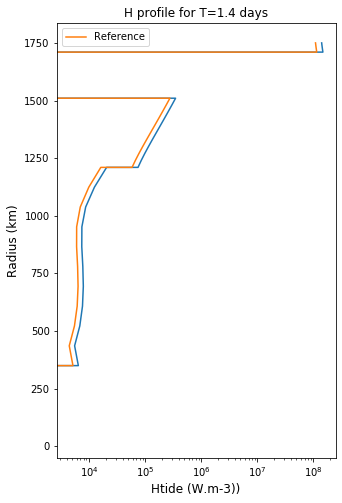

In [433]:
fig, ax = plt.subplots(figsize=(5,8))
ax.plot(H,R)
ax.plot(H_matrix[:,0], R, label="Reference")
ax.set_xscale("log")
plt.title("H profile for T={} days".format(T))
plt.legend()
plt.xlabel("Htide (W.m-3))", fontsize=12)
plt.ylabel("Radius (km)", fontsize=12)
plt.show()

In [420]:
#!jupyter nbconvert --to script profils.ipynb

[NbConvertApp] Converting notebook profils.ipynb to script
[NbConvertApp] Writing 3886 bytes to profils.py


# Lunar Mass Calculation

In [251]:
R = 1750e3
bcrust = 40e3
bmagma = 500e3
bcore = 350e3
bmant = (R-bmagma-bcrust-bcore)

rhocrust = 2900
rhomagma = 3300
rhomant = 3300
rhocore = 7800

In [252]:
Mcore = 4/3 *np.pi* bcore**3 * rhocore
Mmant =  4/3 *np.pi* (bcore+bmant)**3 * rhomant - 4/3 *np.pi* (bcore)**3 * rhomant
Mmagma =  4/3 *np.pi* (bcore+bmant+bmagma)**3 * rhomagma - 4/3 *np.pi* (bcore+bmant)**3 * rhomagma
Mcrust =  4/3 *np.pi* (bcore+bmant+bmagma+bcrust)**3 * rhocrust - 4/3 *np.pi* (bcore+bmant+bmagma)**3 * rhocrust

In [253]:
Mtot = Mcore + Mmant+ Mmagma+Mcrust
Mtot

7.428907141455552e+22

In [255]:
rho_moy = Mtot / (4/3 *np.pi* R**3)
rho_moy

3309.1935906705535